# Лабораторная работа № 2. Работа с массивами и таблицами.

В работе проводится обзор основных возможностей языка Python и модулей **numpy**, **pandas** для анализа данных.

## Цель работы

Изучить основные возможности языка Python и модулей **numpy** и **pandas** по работе с векторами, одномерными и многомерными массивами. Освоить выполнение векторных операций над массивами данных, булево индексирование, а также аггрегирование двумерных таблиц.

## Модуль numpy

NumPy это open-source модуль для языка Python, который предоставляет общие математические и числовые операции в виде пре-скомпилированных, быстрых функций. Они объединяются в высокоуровневые пакеты. NumPy (Numeric Python) предоставляет базовые методы для манипуляции с большими массивами и матрицами. SciPy (Scientific Python) расширяет функционал numpy огромной коллекцией полезных алгоритмов, таких как минимизация, преобразование Фурье, регрессия, и другие прикладные математические техники.

Всю документацию по этому модулю и примеры его использования можно найти на [официальном сайте.](https://numpy.org/doc/stable/ "numpy.org")

Чтобы использовать модуль, его необходимо подключить с помощью команды **import**. Команда **as** позволяет обращаться к модулю через любое другое ключевое слово. Это позволяет сделать код более кратким и легко воспринимаемым. Стандартное сокращение для модуля **numpy** - это **np**.

In [8]:
import numpy as np

### Создание массивов

Ключевым типом данных, с которым работает **numpy**, являются массивы различных размерностей. В конструктор **np.array()** можно передать любой объект, имеющий структуру массива, например, список, в том числе многомерный. Также можно задать тип данных.

In [9]:
arr = np.array([1,2,3,4,5], dtype=int)
arr

array([1, 2, 3, 4, 5])

In [10]:
arr = np.array([[1,2,3],[4,5,6]], dtype=np.float32)
arr

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

Конструкторы **np.zeros()**, **np.ones()**, **np.empty()** позволяют создавать массивы, состоящие из нулей и единиц, пустые массивы соответственно. Размер массива указывается в параметре **shape**.

In [11]:
arr = np.zeros(shape=(2,3))
arr

array([[0., 0., 0.],
       [0., 0., 0.]])

In [12]:
arr = np.ones(shape=(3,2), dtype=int)
arr

array([[1, 1],
       [1, 1],
       [1, 1]])

In [13]:
arr = np.empty(shape=(2,2))
arr

array([[2.12199579e-314, 1.33511290e-306],
       [7.37145944e-321, 5.11400986e-312]])

Массивы имеют несколько атрибутов, например, **shape** (форма), **size** (размер), **dtype** (тип данных).

In [14]:
print('Shape: ', arr.shape)
print('Size: ', arr.size)
print('Data type: ', arr.dtype)

Shape:  (2, 2)
Size:  4
Data type:  float64


### Индексирование

Получить определенный элемент массива можно стандартным образом, указав в квадратных скобках номер элемента.

In [15]:
arr2d = np.array([[1,2,3,4,5],[6,7,8,9,10],[11,12,13,14,15]])
arr2d

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15]])

In [16]:
arr2d[2,3]

14

Очень мощным (в смысле уменьшения временных затрат на выполнение операции) способом получения какой-то части массива является *slicing*. 

В квадратных скобках через двоеточие указывается последовательно начальный индекс, конечный индекс и шаг, с которым нужно выдавать элементы массива. Если не указан первый, то он подразумевается равным 0. Если не указан второй, то он подразумевается равным максимальному индексу. Если не указан последний, то он подразумевается равным 0. 

In [17]:
arr2d[:,2]

array([ 3,  8, 13])

In [18]:
arr2d[:2, 1:4]

array([[2, 3, 4],
       [7, 8, 9]])

In [19]:
arr2d[:2, 1:]

array([[ 2,  3,  4,  5],
       [ 7,  8,  9, 10]])

In [20]:
arr2d[:2, 1::2]

array([[2, 4],
       [7, 9]])

Значение -1 обозначает максимальный индекс, -2 - предшествующий максимальному и т.д. Если значение -1 стоит в качестве шага для *slising*, то это означает, что элементы будут возвращаться в обратном порядке. Такой трюк можно использовать, например, для изменения порядка следования элементов в массиве на противоположный. 

In [21]:
arr2d[:,-1]

array([ 5, 10, 15])

In [22]:
arr2d[:,::-1]

array([[ 5,  4,  3,  2,  1],
       [10,  9,  8,  7,  6],
       [15, 14, 13, 12, 11]])

In [23]:
arr2d[::-1,::-1]

array([[15, 14, 13, 12, 11],
       [10,  9,  8,  7,  6],
       [ 5,  4,  3,  2,  1]])

### Генераторы

Другим способ создания массивов с упорядоченными элементами являются различные генераторы. Например, метод **np.arange(a,b,c)**, который создает массив чисел в диапазоне от **a** до **b** с шагом **c**.

**np.linspace(a, b, n)** создает массив чисел в количестве **n**, линейно расположенных в диапазоне от **a** до **b**. Параметр **endpoint** указывает на то, включать **b** в массив или нет. По умолчанию он равен **True**.

**np.logspace(a, b, n)** создает массив чисел в количестве **n**, логарифмически расположенных в диапазоне от **$10^a$** до **$10^b$**. Параметр **endpoint** указывает на то, включать **b** в массив или нет. По умолчанию он равен **True**.

In [24]:
np.arange(0,100,2)

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
       34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66,
       68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98])

In [25]:
np.linspace(0,100,20)

array([  0.        ,   5.26315789,  10.52631579,  15.78947368,
        21.05263158,  26.31578947,  31.57894737,  36.84210526,
        42.10526316,  47.36842105,  52.63157895,  57.89473684,
        63.15789474,  68.42105263,  73.68421053,  78.94736842,
        84.21052632,  89.47368421,  94.73684211, 100.        ])

In [26]:
np.linspace(0,100,20, endpoint=False)

array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45., 50., 55., 60.,
       65., 70., 75., 80., 85., 90., 95.])

In [27]:
np.logspace(-5,5,10)

array([1.00000000e-05, 1.29154967e-04, 1.66810054e-03, 2.15443469e-02,
       2.78255940e-01, 3.59381366e+00, 4.64158883e+01, 5.99484250e+02,
       7.74263683e+03, 1.00000000e+05])

In [28]:
np.logspace(-5,5,10, endpoint=False)

array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
       1.e+03, 1.e+04])

### Увеличение массива

Для того, чтобы добавить элемент в одномерный массив, применяется функция **np.append(arr1, arr2)**, где в качестве первого аргумента передается массив, в который нужно добавить элементы, а последующие - то, что нужно добавить. Они могут быть как скалярами, так и одномерными массивами. При этом возвращается новый массив, а не изменяется старый.

In [29]:
arr1d = np.arange(0,20,2)
arr1d

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [30]:
np.append(arr1d, 20)
arr1d

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [31]:
arr1d = np.append(arr1d, 20)
arr1d

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20])

In [32]:
arr1d = np.append(arr1d, [22, 24, 26, 28])
arr1d

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28])

In [33]:
arr1d = np.append(arr1d, arr1d[::4])
arr1d

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28,  0,  8,
       16, 24])

Иногда необходимо создать пустой массив и поэлементно добавлять в него значения (например, в цикле for). При добавлении первого элемента произойдет ошибка, поскольку в пустой массив с помощью **np.append()** добавить новое значение невозможно. Для решения этой проблемы удобно использовать конструкцию **if / else**. В этом случае, если **arr = None** (первая итерация), то выполниться **arr = np.array(i)** и создастся массив. На всех последующих итерациях к массиву будет добавляться по одному элементу.

In [34]:
arr = None
for i in range(10):
    arr = np.append(arr, i) if arr is not None else np.array(i)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Для объединения двух многомерных массивов используются методы **np.vstack((arr1, arr2, ...))** - объединение вдоль вертикальной оси, **np.hstack((arr1, arr2, ...))** - объединение вдоль горизонтальной оси. Параметры **arr1**, **arr2**, ... должны иметь одинаковую ширину (в случае с **np.vstack()**) или одинаковую высоту (в случае с **np.hstack()**). 

Существуют и другие (более общие) способы объединения массивов - **np.concatenate()** и **np.stack()**.

In [35]:
arr = np.vstack((arr2d, arr2d[:2]))
arr

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10]])

In [36]:
arr = np.hstack((arr, arr, arr[:,:3]))
arr

array([[ 1,  2,  3,  4,  5,  1,  2,  3,  4,  5,  1,  2,  3],
       [ 6,  7,  8,  9, 10,  6,  7,  8,  9, 10,  6,  7,  8],
       [11, 12, 13, 14, 15, 11, 12, 13, 14, 15, 11, 12, 13],
       [ 1,  2,  3,  4,  5,  1,  2,  3,  4,  5,  1,  2,  3],
       [ 6,  7,  8,  9, 10,  6,  7,  8,  9, 10,  6,  7,  8]])

### Векторные операции

Выполнение арифметических операций в векторной форме позволяет существенно ускорить выполнение этих операций, особенно если массивы очень большие. Поэтому всегда надо стараться писать код так, чтобы он был векторным.

Простые арифметические операции (сложение, вычитание, умножение и деление на число), возведение в степень, примененные к массивам, являются по определению векторными и выполняются поэлементно.

In [37]:
arr2d

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15]])

In [38]:
arr2d + 5

array([[ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20]])

In [39]:
arr2d * 2

array([[ 2,  4,  6,  8, 10],
       [12, 14, 16, 18, 20],
       [22, 24, 26, 28, 30]])

In [40]:
arr2d ** 2

array([[  1,   4,   9,  16,  25],
       [ 36,  49,  64,  81, 100],
       [121, 144, 169, 196, 225]])

Сложение и вычитание, произведение и деление двух массивов также являются векторными операциями (массивы должны иметь одинаковый размер) и выполняются поэлементно.

In [41]:
arr2d + np.ones(shape=arr2d.shape)

array([[ 2.,  3.,  4.,  5.,  6.],
       [ 7.,  8.,  9., 10., 11.],
       [12., 13., 14., 15., 16.]])

In [42]:
arr2d / arr2d

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

Примененить к элементам массивов более сложные функции можно с помощью определенных в модуле **numpy** стандартных функций: **np.sin()**, **np.log()** и т.д.  

In [43]:
np.sin(arr2d)

array([[ 0.84147098,  0.90929743,  0.14112001, -0.7568025 , -0.95892427],
       [-0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849, -0.54402111],
       [-0.99999021, -0.53657292,  0.42016704,  0.99060736,  0.65028784]])

In [44]:
np.log(arr2d)

array([[0.        , 0.69314718, 1.09861229, 1.38629436, 1.60943791],
       [1.79175947, 1.94591015, 2.07944154, 2.19722458, 2.30258509],
       [2.39789527, 2.48490665, 2.56494936, 2.63905733, 2.7080502 ]])

С помощью метода **np.apply_along_axis(func, axis, arr)** можно применить различные функции **func** к столбцам или строкам массива **arr**. Функция **func** принимает на вход одномерный массив, т.е. выполняет какую-то операцию над столбцами (если **axis** = 0) или над строками (если **axis** = 1).

Функция **func** может быть встроенной (определенной в модуле **numpy**) или определенной самим пользователем. Главное, чтобы она принимала на вход одномерный массив. Отдельным классом таких функций являются lambda-выражения, или анонимные функции. Их синтаксис таков: *lambda x: x+1*, где до двоеточия указываются аргументы, а после двоеточия - операция.  

In [63]:
print(np.apply_along_axis(np.max, 0, arr2d))
print(arr2d)

[11 12 13 14 15]
[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]]


In [46]:
np.apply_along_axis(np.max, 1, arr2d)

array([ 5, 10, 15])

In [47]:
np.apply_along_axis(lambda x: x[::-1], 1, arr2d)

array([[ 5,  4,  3,  2,  1],
       [10,  9,  8,  7,  6],
       [15, 14, 13, 12, 11]])

## Модуль pandas

Данный пакет делает Python мощным инструментом для анализа данных. Пакет дает возможность строить сводные таблицы, выполнять группировки, предоставляет удобный доступ к табличным данным, а при наличии пакета matplotlib дает возможность рисовать графики на полученных наборах данных (об этом в следующей лабораторной работе).

Общепринятым способом краткого наименования этого модуля является **pd**. Всю документацию по этому модулю, а также примеры его использования можно найти на [официальном сайте](https://pandas.pydata.org/docs/ "pandas.pydata.org").

In [48]:
import pandas as pd

Этот модуль используется для эффективной работы с таблицами. Базовыми классами являются *Index* (индексы), *Series* (столбцы), *DataFrame* (матрица). Их конструкторы принимают на вход объекты, имеющие логику одномерных массивов (для *Index* и *Series*) или же двумерных массивов (для *DataFrame*).

### Класс Index

Этот класс описывает индексы и колонки, содержащиеся в табличке. Объекты класса **Index** обладают множеством атрибутов, например, **name**, **size**, **shape**, **values** и др. Атрибут **values** выдает элементы, содержащиеся в объекте, в виде массива **np.array**.

In [49]:
idx = pd.Index(['One','Two','Three','Four','Five'], name='numbers')
print(idx)
print('Name: ', idx.name)
print('Shape: ', idx.shape)
print('Values: ', idx.values)

Index(['One', 'Two', 'Three', 'Four', 'Five'], dtype='object', name='numbers')
Name:  numbers
Shape:  (5,)
Values:  ['One' 'Two' 'Three' 'Four' 'Five']


Метод **drop(labels)** возвращает объект **Index** с выкинутыми значениями **labels**. Метод **drop_duplicates(keep)** возвращает объект с уделенными повторяющимися значениями. Если параметр **keep = 'first'**, по сохраняется первое появление повторяющегося значения, если **keep = 'last'**, то сохранияет последнее упоминание. Метод **unique()** возвращает объект с уникальными элементами, т.е. встречающимися только 1 раз. Этот метод аналогичен методу **drop_duplicates()**.

In [50]:
idx = pd.Index(['One','Two','Three','Four','Five','One','Two'], name='numbers')
idx

Index(['One', 'Two', 'Three', 'Four', 'Five', 'One', 'Two'], dtype='object', name='numbers')

In [51]:
idx = idx.drop_duplicates()
idx

Index(['One', 'Two', 'Three', 'Four', 'Five'], dtype='object', name='numbers')

In [52]:
idx.drop(['One','Two'])

Index(['Three', 'Four', 'Five'], dtype='object', name='numbers')

In [53]:
idx.unique()

Index(['One', 'Two', 'Three', 'Four', 'Five'], dtype='object', name='numbers')

При желании можно переименовать те или иные элементы в объекте **Index** с помощью метода **reindex(new_labels)**, подав ему на вход новые элементы.

In [54]:
idx.reindex(['NewOne','NewTwo','NewThree','NewFour'])

(Index(['NewOne', 'NewTwo', 'NewThree', 'NewFour'], dtype='object', name='numbers'),
 array([-1, -1, -1, -1], dtype=int64))

### Класс Series

Этот класс представляет собой реализацию одномерного массива с множеством различных методов и атрибутов. Конструктор класса принимает на вход данные в виде массива, индексы (в виде массива или объекта класса **Index**), имя объекта. У класса **Series** довольно много атрибутов. Вот некоторые их них: **name**, **values**, **size**, **index** и др.

In [55]:
ser = pd.Series(np.arange(0,100,1), name='numbers', index=np.arange(100,300,2))
ser

100     0
102     1
104     2
106     3
108     4
       ..
290    95
292    96
294    97
296    98
298    99
Name: numbers, Length: 100, dtype: int32

Сменить тип данных можно с помощью метода **astype(new_type)**, который по определению возвращает копию объекта.

In [56]:
ser.astype(np.float32)

100     0.0
102     1.0
104     2.0
106     3.0
108     4.0
       ... 
290    95.0
292    96.0
294    97.0
296    98.0
298    99.0
Name: numbers, Length: 100, dtype: float32

Индексирование одного элемента можно проводить подобно обычному массиву, однако в квадратных скобках надо указать именно значение элемента из **Index**, а не порядковый номер элемента. Для того, чтобы получить *slice*, то есть получить какую-то часть объекта, нужно использовать метод **loc[a,b,c]**. Его функционал полностью аналогичен индексированию массивов **numpy**, c той лишь разницей, что элемент с индексом **b** включается.

In [57]:
ser[100]

0

In [58]:
ser.loc[100:120]

100     0
102     1
104     2
106     3
108     4
110     5
112     6
114     7
116     8
118     9
120    10
Name: numbers, dtype: int32

In [59]:
ser.loc[100:120:2]

100     0
104     2
108     4
112     6
116     8
120    10
Name: numbers, dtype: int32

Если же нужно получить *slice* на основе порядковых номеров элементов, то используется метод **iloc[a:b:c]**. Работает он аналогично методу **loc[a:b:c]**, с той лишь разницей, что индекс с номером **b** не включается.

In [60]:
ser.iloc[0:10]

100    0
102    1
104    2
106    3
108    4
110    5
112    6
114    7
116    8
118    9
Name: numbers, dtype: int32

Полезным бывает итерирование по всем парам (индекс, значение) с помощью метода **iteritems()**.

In [64]:
for index, value in ser.iloc[:10].items():
    print('Index:', index, ', Value:', value)

Index: 100 , Value: 0
Index: 102 , Value: 1
Index: 104 , Value: 2
Index: 106 , Value: 3
Index: 108 , Value: 4
Index: 110 , Value: 5
Index: 112 , Value: 6
Index: 114 , Value: 7
Index: 116 , Value: 8
Index: 118 , Value: 9


**Series** имеет широким набором векторных операций: сложение **add()**, вычитание **sub()**, умножение **mul()**, деление **div()**, округление **round()**, возведение в степень **pow()**, операций сравнения: меньше **lt()**, больше **gt()**, меньши или равно **le()**, больше или равно **ge()**, не равен **ne()**, равен **eq()** и др.

In [65]:
ser.add(ser)

100      0
102      2
104      4
106      6
108      8
      ... 
290    190
292    192
294    194
296    196
298    198
Name: numbers, Length: 100, dtype: int32

In [66]:
ser / ser

100    NaN
102    1.0
104    1.0
106    1.0
108    1.0
      ... 
290    1.0
292    1.0
294    1.0
296    1.0
298    1.0
Name: numbers, Length: 100, dtype: float64

In [67]:
ser1 = ser.pow(np.linspace(1,2,len(ser)))
ser1

100       0.000000
102       1.000000
104       2.028203
106       3.101555
108       4.230441
          ...     
290    7508.257976
292    8025.528491
294    8578.407365
296    9169.354356
298    9801.000000
Name: numbers, Length: 100, dtype: float64

In [68]:
ser1.round(2)

100       0.00
102       1.00
104       2.03
106       3.10
108       4.23
        ...   
290    7508.26
292    8025.53
294    8578.41
296    9169.35
298    9801.00
Name: numbers, Length: 100, dtype: float64

In [69]:
ser.lt(-ser)

100    False
102    False
104    False
106    False
108    False
       ...  
290    False
292    False
294    False
296    False
298    False
Name: numbers, Length: 100, dtype: bool

Также у класса **Series** есть много статистических функций **mean()**, **max()**, **min()**, **skew()**, **kurtosis()** и др. Значения некоторых статистических функций можно получить с помощью метода **describe()**.

In [70]:
ser.describe()

count    100.000000
mean      49.500000
std       29.011492
min        0.000000
25%       24.750000
50%       49.500000
75%       74.250000
max       99.000000
Name: numbers, dtype: float64

Заполнение пропущенных значений производится с помощью метода **fillna()**, при этом параметр **inplace** позволяет выполнять заполнение исходного объекта, а не создавать его копию. Аналогично работает метод **replace()**, который позволяет заменить одни значения на другие. Для этого в него надо передать словарь, в котором старые значения являются ключами, а новые - значениями.

In [71]:
ser = pd.Series([1,2,3,np.nan,5,6,7,np.nan])
ser

0    1.0
1    2.0
2    3.0
3    NaN
4    5.0
5    6.0
6    7.0
7    NaN
dtype: float64

In [72]:
ser.fillna(10)

0     1.0
1     2.0
2     3.0
3    10.0
4     5.0
5     6.0
6     7.0
7    10.0
dtype: float64

In [73]:
ser.fillna(10, inplace=True)
ser.replace({10:4}, inplace=True)
ser

0    1.0
1    2.0
2    3.0
3    4.0
4    5.0
5    6.0
6    7.0
7    4.0
dtype: float64

Объединение нескольких объектов **Series** производится с помощью метода **append()**. Если параметр **ignore_index = True**, то индексы в итоговом объекте будут от 0 до максимального индекса. Если же **ignore_index = False**, то сохранятся индексы исходных объектов.

In [76]:
ser1 = pd.Series([1,1,1])
ser2 = pd.Series([2,2,2])
ser1._append(ser2, ignore_index = False)

0    1
1    1
2    1
0    2
1    2
2    2
dtype: int64

In [77]:
ser1._append(ser2, ignore_index = True)

0    1
1    1
2    1
3    2
4    2
5    2
dtype: int64

### Класс DataFrame

Класс **Series** описывает структуру таблиц. Каждая колонка является объектом класса **Series**, а названия колонок и индексы - объектами класса **Index**. Функционал этого класса почти полностью совпадает с функционалом класса **Series**. Перечислим основные возможности по работе с таблицами, предоставляемые классом **DataFrame**. Конструктор принимает на себя данные, имеющие логическую структуру двумерного массива: двумерный массив, список списков, кортеж из списков, словарь. В последнем случае ключи словаря будут являться названиями колонок. Также в конструктор можно передать непосредственно названия колонок и индексов, а также тип данных.

In [78]:
dt = pd.DataFrame(np.ones(shape=(4,5))/2., columns=['one','two','three','four','five'])
dt

,one,two,three,four,five
0,0.5,0.5,0.5,0.5,0.5
1,0.5,0.5,0.5,0.5,0.5
2,0.5,0.5,0.5,0.5,0.5
3,0.5,0.5,0.5,0.5,0.5


In [79]:
dt = pd.DataFrame({'one':[1]*5,
                  'two':[2]*5,
                  'three':[3]*5,
                   'four':[4]*5,
                   'five':[5]*5},
                 dtype=np.float32)
dt

,one,two,three,four,five
0,1.0,2.0,3.0,4.0,5.0
1,1.0,2.0,3.0,4.0,5.0
2,1.0,2.0,3.0,4.0,5.0
3,1.0,2.0,3.0,4.0,5.0
4,1.0,2.0,3.0,4.0,5.0


Информацию о количестве строк и столбцов, о типах данных можно получить с помощью метода **info()**. Статистику по колонкам можно получить с помощью метода **describe()**.

In [80]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   one     5 non-null      float32
 1   two     5 non-null      float32
 2   three   5 non-null      float32
 3   four    5 non-null      float32
 4   five    5 non-null      float32
dtypes: float32(5)
memory usage: 228.0 bytes


In [81]:
dt.describe()

,one,two,three,four,five
count,5.0,5.0,5.0,5.0,5.0
mean,1.0,2.0,3.0,4.0,5.0
std,0.0,0.0,0.0,0.0,0.0
min,1.0,2.0,3.0,4.0,5.0
25%,1.0,2.0,3.0,4.0,5.0
50%,1.0,2.0,3.0,4.0,5.0
75%,1.0,2.0,3.0,4.0,5.0
max,1.0,2.0,3.0,4.0,5.0


Если требуется посмотреть на несколько строк таблицы, то применяется метод **head(n)**, возвращающий первые **n** строк. Если **n** не задано, то оно полагается равным 5. Этот метод особенно полезен, если требуется увидеть структуру таблицы, а данных очень много. Также есть метод **tail(n)**, который позволяет увидеть последние **n** строк таблицы.

In [82]:
dt.head(3)

,one,two,three,four,five
0,1.0,2.0,3.0,4.0,5.0
1,1.0,2.0,3.0,4.0,5.0
2,1.0,2.0,3.0,4.0,5.0


Изменить тип данных одной или нескольких колонок можно с помощью метода **astype(dict)**, в словаре **dict** можно определить, к какому типу нужно привести какую колонку. Метод возвращает измененную копию таблицы.

In [84]:
dt.astype({'one':np.int32,'three':bool}).head(3)

,one,two,three,four,five
0,1,2.0,True,4.0,5.0
1,1,2.0,True,4.0,5.0
2,1,2.0,True,4.0,5.0


### Индексирование и итерирование

Индексирование производится аналогично классу **Series** с помощью методов **loc[a1:b1:c1, a2:b2:c2]** и **iloc[a1:b1:c1, a2:b2:c2]**. Отличие состоит в том, что **loc[]** включает в индексирование конечные индексы **b1, b2**, а **iloc[]** нет.

In [ ]:
dt.loc[:3, 'two'::2]

,two,four
0,2.0,4.0
1,2.0,4.0
2,2.0,4.0
3,2.0,4.0


In [ ]:
dt.iloc[:3, 1::2]

,two,four
0,2.0,4.0
1,2.0,4.0
2,2.0,4.0


Булевое индексирование позволяет выдавать только те элементы таблицы, которые удовлетворяют определенному условию. Выполняется такое индексирование следующим образом. Операция **dt['one'] > 1** выдает объект **Series** булева типа. Если использовать этот массив в качестве индексов, то мы получим все ряды таблицы, у которой **dt['one'] > 1**.

In [ ]:
dt.loc[2:4, 'one'] = 2
dt

,one,two,three,four,five
0,1.0,2.0,3.0,4.0,5.0
1,1.0,2.0,3.0,4.0,5.0
2,2.0,2.0,3.0,4.0,5.0
3,2.0,2.0,3.0,4.0,5.0
4,2.0,2.0,3.0,4.0,5.0


In [ ]:
dt['one'] > 1

0    False
1    False
2     True
3     True
4     True
Name: one, dtype: bool

In [ ]:
dt[dt['one'] > 1]

,one,two,three,four,five
2,2.0,2.0,3.0,4.0,5.0
3,2.0,2.0,3.0,4.0,5.0
4,2.0,2.0,3.0,4.0,5.0


Итерирование по элементам таблицы можно проводить различными способами: по парам **(column_label, Series)** с помощью методов **items()** и **iteritems()** (они идентичны), по парам **(index_label, Series)** с помощью метода **iterrows()**.

In [86]:
for col, ser in dt.items():
    print(col, ser.name)

one one
two two
three three
four four
five five


In [87]:
for idx, ser in dt.iterrows():
    print(idx, ser.name)

0 0
1 1
2 2
3 3
4 4


Класс **DataFrame**, так же как и класс **Series**, имеет много различных поэлементных операций: сложение **add()**, вычитание **sub()**, умножение **mul()**, деление **div()**, округление **round()**, возведение в степень **pow()**, операций сравнения: меньше **lt()**, больше **gt()**, меньши или равно **le()**, больше или равно **ge()**, не равен **ne()**, равен **eq()** и др.

Есть возможность также находить значение различных статистических функций **mean()**, **max()**, **min()**, **skew()**, **kurtosis()**, **median()**, **corr()**, **cov()** и др, параметр **axis** определять направление, вдоль которого применяется та или иная функция (0 означает по колонкам, 1 - по рядам).

In [ ]:
dt.mean(axis=0)

one      1.6
two      2.0
three    3.0
four     4.0
five     5.0
dtype: float32

In [ ]:
dt.mean(axis=1)

0    3.0
1    3.0
2    3.2
3    3.2
4    3.2
dtype: float32

### Применение пользовательских и аггрегирующих функций

Метод **apply(func, axis)** позволяет применять любую функцию **func**, которая принимает на вход одномерный массив, к колонкам (**axis = 0**) или к строкам (**axis == 1**). Для того, чтобы применить функцию ко всем элементам массива, т.е. поэлементно, нужно применить использовать метод **applymap(func)**.

In [88]:
dt.applymap(np.sin)

C:\Users\alex\AppData\Local\Temp\ipykernel_18472\4054724116.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dt.applymap(np.sin)


,one,two,three,four,five
0,0.841471,0.909297,0.14112,-0.756802,-0.958924
1,0.841471,0.909297,0.14112,-0.756802,-0.958924
2,0.841471,0.909297,0.14112,-0.756802,-0.958924
3,0.841471,0.909297,0.14112,-0.756802,-0.958924
4,0.841471,0.909297,0.14112,-0.756802,-0.958924


In [89]:
dt.apply(np.min, axis=0)

one      1.0
two      2.0
three    3.0
four     4.0
five     5.0
dtype: float32

Для группировки рядов по значениям в определенных колонках используется метод **groupby(by, axis)**, где в качестве первого параметра можно передать названия колонок, по значениям которых будет производиться группировка. Параметр **axis** показывает, будет ли производиться разбиение по колонкам или по рядам. Этот метод возвращает объект **DataFrameGroupBy**, который содержит в себе группы. Чтобы получить снова таблицу, необходимо применить дополнительно любую функцию, выделяющую один элемент из нескольких (среднее, максимум и др.)

In [90]:
dt.loc[2:4, 'one'] = 2
dt.loc[:2, 'three'] = 2
dt.loc[3:4, 'five'] = 2
dt

,one,two,three,four,five
0,1.0,2.0,2.0,4.0,5.0
1,1.0,2.0,2.0,4.0,5.0
2,2.0,2.0,2.0,4.0,5.0
3,2.0,2.0,3.0,4.0,2.0
4,2.0,2.0,3.0,4.0,2.0


In [91]:
dt.groupby(['one'])

In [ ]:
dt.groupby(['one']).mean()

,two,three,four,five
one,,,,
1.0,2.0,2.000000,4.0,5.0
2.0,2.0,2.666667,4.0,3.0


Другой способ аггрегирования состоит в расчете определенных аггрегирующих функций (максимум, среднее и пр.) для определенных столбцов с помощью метода **agg(dict, axis)**. Ключами словаря **dict** являются названия колонок (или индексы рядов), а значениями - функции. Или же можно просто передать набор функций, в этом случае они будут применены ко всем колонкам. Параметр **axis** позволяет применять аггрегирование либо к колонкам, либо к рядам.

In [ ]:
dt.agg([np.mean, np.median])

,one,two,three,four,five
mean,1.6,2.0,2.4,4.0,3.8
median,2.0,2.0,2.0,4.0,5.0


In [ ]:
dt.agg([np.mean, np.sum], axis=1)

,mean,sum
0,2.8,14.0
1,2.8,14.0
2,3.0,15.0
3,2.6,13.0
4,2.6,13.0


## Задания для самостоятельной работы

### Задание 1.

Используя модуль **numpy**:
1. Создайте массив numpy длиной 50, содержащий значения квадратного корня для отрезка от 0 до 10. Исходное разбиение отрезка линейное. Правую границу отрезка не включать.

In [96]:
sqrt_50 = np.sqrt(np.linspace(0,10,50, endpoint=False))
sqrt_50

array([0.        , 0.4472136 , 0.63245553, 0.77459667, 0.89442719,
       1.        , 1.09544512, 1.18321596, 1.26491106, 1.34164079,
       1.41421356, 1.4832397 , 1.54919334, 1.61245155, 1.67332005,
       1.73205081, 1.78885438, 1.84390889, 1.8973666 , 1.94935887,
       2.        , 2.04939015, 2.0976177 , 2.14476106, 2.19089023,
       2.23606798, 2.28035085, 2.32379001, 2.36643191, 2.40831892,
       2.44948974, 2.48997992, 2.52982213, 2.56904652, 2.60768096,
       2.64575131, 2.68328157, 2.7202941 , 2.75680975, 2.79284801,
       2.82842712, 2.86356421, 2.89827535, 2.93257566, 2.96647939,
       3.        , 3.03315018, 3.06594194, 3.09838668, 3.13049517])

2. Оставьте только каждое 2-е значение в массиве. Расположите их в обратном порядке.

In [98]:
# напишите здесь ваше решение
sqrt_50_combed = sqrt_50[::-2]
sqrt_50_combed

array([3.13049517, 3.06594194, 3.        , 2.93257566, 2.86356421,
       2.79284801, 2.7202941 , 2.64575131, 2.56904652, 2.48997992,
       2.40831892, 2.32379001, 2.23606798, 2.14476106, 2.04939015,
       1.94935887, 1.84390889, 1.73205081, 1.61245155, 1.4832397 ,
       1.34164079, 1.18321596, 1.        , 0.77459667, 0.4472136 ])

3. Добавьте снизу к этой строке еще одну, содержащую значения из отрезка [1,2], расположенные в логарифмическом масштабе.

In [103]:
# напишите здесь ваше решение
result = np.vstack((sqrt_50_combed, np.logspace(1,2,len(sqrt_50_combed), endpoint=True)))
result

array([[  3.13049517,   3.06594194,   3.        ,   2.93257566,
          2.86356421,   2.79284801,   2.7202941 ,   2.64575131,
          2.56904652,   2.48997992,   2.40831892,   2.32379001,
          2.23606798,   2.14476106,   2.04939015,   1.94935887,
          1.84390889,   1.73205081,   1.61245155,   1.4832397 ,
          1.34164079,   1.18321596,   1.        ,   0.77459667,
          0.4472136 ],
       [ 10.        ,  11.00694171,  12.11527659,  13.33521432,
         14.67799268,  16.15598098,  17.7827941 ,  19.57341781,
         21.5443469 ,  23.71373706,  26.10157216,  28.72984833,
         31.6227766 ,  34.80700588,  38.3118685 ,  42.16965034,
         46.41588834,  51.08969775,  56.23413252,  61.89658189,
         68.12920691,  74.98942093,  82.54041853,  90.85175757,
        100.        ]])

4. Посчитайте от каждого столбца среднее геометрическое и представьте ответ в виде одномерного массива.

In [105]:
# напишите здесь ваше решение
from statistics import geometric_mean
result = np.apply_along_axis(geometric_mean, 0, result)
result

array([5.59508281, 5.8091862 , 6.02875027, 6.253521  , 6.48316084,
       6.71723152, 6.95517289, 7.19627653, 7.4396525 , 7.68418695,
       7.92848724, 8.1708099 , 8.40896415, 8.64018002, 8.86092354,
       9.06663013, 9.25130635, 9.40690981, 9.52233239, 9.58162133,
       9.56059218, 9.41959019, 9.08517576, 8.3888896 , 6.68740305])

5. Определите его среднее значение.

In [106]:
# напишите здесь ваше решение
result.mean()

7.9256814868795615

6. Создайте одномерный массив длиной 1000 путем поэлементного добавления в него значений функции sinc(x) на отрезке [-3,3].

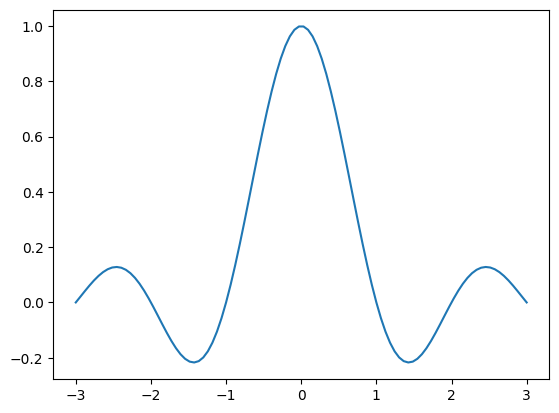

In [109]:
# напишите здесь ваше решение
from matplotlib import pyplot as plt

result = np.sinc(np.linspace(-3, 3, 100, endpoint=True))
plt.plot(np.linspace(-3, 3, 100, endpoint=True), result)
plt.show()

7. Определите среднее значение, максимальное значение, минимальное значение, стандартное отклонение, медиану для этого массива.

In [ ]:
# напишите здесь ваше решение


### Задание 2.

Используя модуль **pandas**: 
1. Создайте таблицу с колонками [тип, цвет, масса, размер, стоимость] и индексами [яблоко, банан, апельсин, мандарин, груша, персик, картошка, морковь, лук, капуста]. Заполните массив значениями, отражающими действительность (тип - овощ или фрукт, цвет - строковый тип, остальные колонки - числовой тип).

In [ ]:
# напишите здесь ваше решение


2. Выведите последние 4 записи в таблице.

In [ ]:
# напишите здесь ваше решение


3. Выведите информацию о числе колонок, их типе, числе строк.

In [ ]:
# напишите здесь ваше решение


4. Определите те фрукты, у которых размер больше размера картошки.

In [ ]:
# напишите здесь ваше решение


5. Определите среднюю стоимость тех овощей, которые весят больше банана.

In [ ]:
# напишите здесь ваше решение


6. С помошью итерирования по рядам определите среднюю стоимость фруктов.

In [ ]:
# напишите здесь ваше решение


7. Определите максимальное и минимальное значение, среднее и медиану для массы, размера и стоимости с помощью встроенных статистических функций.

In [ ]:
# напишите здесь ваше решение


8. Определите максимальное и минимальное значение, среднее и медиану для массы, размера и стоимости с помощью метода **agg()**.

In [ ]:
# напишите здесь ваше решение


9. Сгруппируйте таблицу по цвету фруктов и определите среднее и максимальное значение массы и стоимости для этих групп.

In [ ]:
# напишите здесь ваше решение


## Список литературы

- Модуль **numpy** [https://numpy.org/doc/stable/](https://numpy.org/doc/stable/ "numpy")
- Модуль **pandas** [https://pandas.pydata.org/docs/](https://pandas.pydata.org/docs/ "pandas")